# Unsupervised Learning

### Goals of the exercise
This exercise has three parts. The first part is focused on Principal Component Analysis (PCA). You will go through some basic theory, and implent PCA from scratch to do compression and visualization of data.

The second part focuses on clustering using K-means. You will use `scikit-learn` to run K-means clustering, and use PCA to visualize the results.

The last part ties supervised and unsupervised learning together in an effort to evaluate the output of K-means using a logistic regression for multi-class classification approach.

### Tools
You may freely use code from the weekly exercises and the published solutions. In the first part about PCA you may **NOT** use ML libraries like `scikit-learn`. In the K-means part and beyond we encurage the use of `scikit-learn` to iterate quickly on the problems.

## Principal Component Analysis (PCA)
In this section, you will work with the PCA algorithm in order to understand its definition and explore its uses.

### Principle of Maximum Variance: what is PCA supposed to do?
First of all, let us recall the principle/assumption of PCA:

1. What is the variance?
3. What is the covariance?
3. How do we compute the covariance matrix?
2. What is the meaning of the principle of maximum variance?
4. Why do we need this principle?
5. Does the principle always apply?

**Answers:** Enter your answers here.

1. The variance is the spread of the data around its mean, for a dataset its the sum of the the deviation squared of each data point divided by the number of points (the average variance). A large variance means the feature or component is an important distinguisher for the points; it is causing much of the points uniqueness

2. Covariance describes how much two or more features move according to one another, if they tend to move in the same direction or not. A large covariance suggests that if a feature is present in the object it is likely that the other feature is as well. Can also be negative which means they tend to move in opposite directions. Closely linked to the correlation between two features, whereas the correlation is the covariance divided by the product of the standard deviation of both features

3. The covariance matrix can be desribed as C=(1/(n−1))*∑(Xi−¯X)(Xi−¯X).T, where the x-bar is the mean value of x. This is for an uncentered dataset X, where xi-¯x is equivalent to moving the mean to zero. For a centered set, X, the covariance matrix is C = (1/(n-1))* X.t*X

4. We find the principle components by a linear combination of the variables, so that they are no longer correlated. This is done by finding the line through the datapoints that give the maximum variance, ie. along the line that the datapoints are spread out the most. This is our first principal component, and by maximazing the variance, this component therefore contains the most amount of information about the dataset. The next components are found by drawing line perpendicular to the previous. We then project the points onto the principal component line and only keep the lines that give sufficient information about the dataset.

5. To achieve dimension reduction. The principal components are, as mentioned, linear combinations or mixtures of the original variables. By then discarding the original variables and using the PCAs as our new variables (which have no covariance to eachother), we can discard the PCAs, and thereby reduce dimensionality, that contain little information on the data set without losing much information.

6. PCA does not work well to reduce data if the correlation between the variables is weak. 

## Implementation: how is PCA implemented?
Here we implement the basic steps of PCA and we assemble them.

### Importing libraries
We start importing the *numpy* library for performing matrix computations, the *pyplot* library for plotting data, and the *syntheticdata* module to import synthetic data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import syntheticdata

### Centering the Data
Implement a function with the following signature to center the data as explained in *Marsland*.

Note to self: page 158/452 in Marsland

In [2]:
def center_data(A):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    
    m = np.mean(A, axis=0)
    # OUTPUT:
    # X    [NxM] numpy centered data matrix (N samples, M features)
    
    # Centering the data is done by taking each feature and subtracting the mean 
    # of all the corresponding features (the mean of every value in 
    # the column where it is found)
    X = A - m
    return X

Test your function checking the following assertion on *testcase*:

In [3]:
testcase = np.array([[3.,11.,4.3],[4.,5.,4.3],[5.,17.,4.5],[4,13.,4.4]])
answer = np.array([[-1.,-0.5,-0.075],[0.,-6.5,-0.075],[1.,5.5,0.125],[0.,1.5,0.025]])
np.testing.assert_array_almost_equal(center_data(testcase), answer)

### Computing Covariance Matrix
Implement a function with the following signature to compute the covariance matrix as explained in *Marsland*.

In [4]:
def compute_covariance_matrix(A):
    # INPUT:
    # A    [NxM] centered numpy data matrix (N samples, M features
    
    
    # OUTPUT:
    # C    [MxM] numpy covariance matrix (M features, M features)
    #
    # Do not apply centering here. We assume that A is centered before this function is called.
    
    C = np.cov(A.T)
    
    return C

Test your function checking the following assertion on *testcase*:

In [5]:
testcase = center_data(np.array([[22.,11.,5.5],[10.,5.,2.5],[34.,17.,8.5],[28.,14.,7]]))
answer = np.array([[580.,290.,145.],[290.,145.,72.5],[145.,72.5,36.25]])

# Depending on implementation the scale can be different:
to_test = compute_covariance_matrix(testcase)

answer = answer/answer[0, 0]
to_test = to_test/to_test[0, 0]

np.testing.assert_array_almost_equal(to_test, answer)

### Computing eigenvalues and eigenvectors
Use the linear algebra package of `numpy` and its function `np.linalg.eig()` to compute eigenvalues and eigenvectors. Notice that we take the real part of the eigenvectors and eigenvalues. The covriance matrix *should* be a symmetric matrix, but the actual implementation in `compute_covariance_matrix()` can lead to small round off errors that lead to tiny imaginary additions to the eigenvalues and eigenvectors. These are purely numerical artifacts that we can safely remove.

**Note:** If you decide to NOT use `np.linalg.eig()` you must make sure that the eigenvalues you compute are of unit lenght!

In [6]:
def compute_eigenvalue_eigenvectors(A):
    # INPUT:
    # A    [DxD] numpy matrix
    #
    # OUTPUT:
    # eigval    [D] numpy vector of eigenvalues
    # eigvec    [DxD] numpy array of eigenvectors
    
    eigval, eigvec = np.linalg.eig(A)
    
    
    # Numerical roundoff can lead to (tiny) imaginary parts. We correct that here.
    eigval = eigval.real
    eigvec = eigvec.real
    
    return eigval, eigvec

Test your function checking the following assertion on *testcase*:

In [7]:
testcase = np.array([[2,0,0],[0,5,0],[0,0,3]])
answer1 = np.array([2.,5.,3.])
answer2 = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.]])
x,y = compute_eigenvalue_eigenvectors(testcase)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)

### Sorting eigenvalues and eigenvectors
Implement a function with the following signature to sort eigenvalues and eigenvectors as explained in *Marsland*.

Remember that eigenvalue *eigval[i]* corresponds to eigenvector *eigvec[:,i]*.

In [8]:
def sort_eigenvalue_eigenvectors(eigval, eigvec):
    # INPUT:
    # eigval    [D] numpy vector of eigenvalues
    # eigvec    [DxD] numpy array of eigenvectors
    #
    # OUTPUT:
    # sorted_eigval    [D] numpy vector of eigenvalues
    # sorted_eigvec    [DxD] numpy array of eigenvectors
    
    # Sort them ascendingly, then invert the order
    indices = np.argsort(eigval)
    indices = indices[::-1]
    
    sorted_eigval = eigval[indices]
    sorted_eigvec = eigvec[:, indices]
    
    return sorted_eigval, sorted_eigvec

Test your function checking the following assertion on *testcase*:

In [9]:
testcase = np.array([[2,0,0],[0,5,0],[0,0,3]])
answer1 = np.array([5.,3.,2.])
answer2 = np.array([[0.,0.,1.],[1.,0.,0.],[0.,1.,0.]])
x,y = compute_eigenvalue_eigenvectors(testcase)
x,y = sort_eigenvalue_eigenvectors(x,y)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)

### PCA Algorithm
Implement a function with the following signature to compute PCA as explained in *Marsland* using the functions implemented above.

In [10]:
def pca(A,m):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # m    integer number denoting the number of learned features (m <= M)
    #
    # OUTPUT:
    # pca_eigvec    [Mxm] numpy matrix containing the eigenvectors (M dimensions, m eigenvectors)
    # P             [Nxm] numpy PCA data matrix (N samples, m features)
    
    # Center the data
    X = center_data(A)
    
    # Find the covariance matrix
    C = compute_covariance_matrix(X)
    
    # Compute eigenvalues and eigenvectores
    eigval, eigvec = compute_eigenvalue_eigenvectors(C)
    
    # Sort them
    pca_eigval, pca_eigvec = sort_eigenvalue_eigenvectors(eigval, eigvec)
    
    # Reduce dimensions, number of dimensions in final matrix is equal to m
    if m > 0:
        pca_eigvec = pca_eigvec[:, :m]
    
    # Compute new data matrixs
    P = np.dot(pca_eigvec.T, X.T)
    
    return pca_eigvec, P.T

Test your function checking the following assertion on *testcase*:

In [11]:
testcase = np.array([[22.,11.,5.5],[10.,5.,2.5],[34.,17.,8.5]])
x,y = pca(testcase,2)

import pickle
answer1_file = open('PCAanswer1.pkl','rb'); answer2_file = open('PCAanswer2.pkl','rb')
answer1 = pickle.load(answer1_file); answer2 = pickle.load(answer2_file)


test_arr_x = np.sum(np.abs(np.abs(x) - np.abs(answer1)), axis=0)
np.testing.assert_array_almost_equal(test_arr_x, np.zeros(2))


test_arr_y = np.sum(np.abs(np.abs(y) - np.abs(answer2)))
np.testing.assert_almost_equal(test_arr_y, 0)

## Understanding: how does PCA work?
We now use the PCA algorithm you implemented on a toy data set in order to understand its inner workings.

### Loading the data
The module *syntheticdata* provides a small synthetic dataset of dimension [100x2] (100 samples, 2 features).

In [12]:
X = syntheticdata.get_synthetic_data1()

### Visualizing the data
Visualize the synthetic data using the function *scatter()* from the *matplotlib* library.

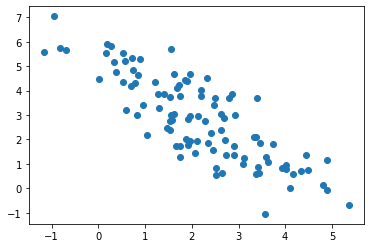

In [13]:
plt.scatter(X[:,0],X[:,1])

### Visualize the centered data
Notice that the data visualized above is not centered on the origin (0,0). Use the function defined above to center the data, and the replot it.

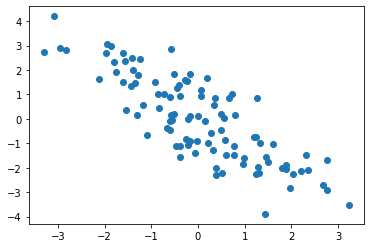

In [14]:
X = center_data(X)
plt.scatter(X[:,0],X[:,1])

### Visualize the first eigenvector
Visualize the vector defined by the first eigenvector.
To do this you need:
- Use the *PCA()* function to recover the eigenvectors
- Plot the centered data as done above 
- The first eigenvector is a 2D vector (x0,y0). This defines a vector with origin in (0,0) and head in (x0,y0). Use the function *plot()* from matplotlib to plot a line over the first eigenvector.

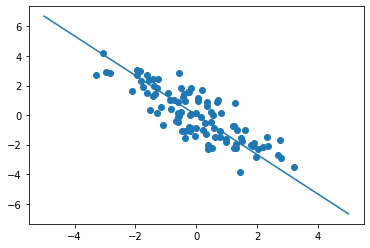

In [15]:
pca_eigvec, _ = pca(X, 2) # Two dimensions
first_eigvec = pca_eigvec[0]

plt.scatter(X[:,0], X[:,1])

x = np.linspace(-5, 5, 1000)
y = first_eigvec[1]/first_eigvec[0] * x
plt.plot(x,y)

### Visualize the PCA projection
Finally, use the *PCA()* algorithm to project on a single dimension and visualize the result using again the *scatter()* function.

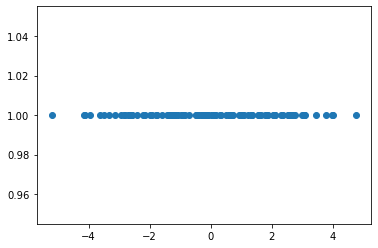

In [16]:
_,P = pca(X, X.shape[1])

plt.scatter(P[:,0], np.ones(P.shape[0]))

## Evaluation: when are the results of PCA sensible?
So far we have used PCA on synthetic data. Let us now imagine we are using PCA as a pre-processing step before a classification task. This is a common setup with high-dimensional data. We explore when the use of PCA is sensible.

### Loading the first set of labels
The function *get_synthetic_data_with_labels1()* from the module *syntethicdata* provides a first labeled dataset.

In [17]:
X,y = syntheticdata.get_synthetic_data_with_labels1()

### Running PCA
Process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using *scatter()* before and after running PCA. Comment on the results.

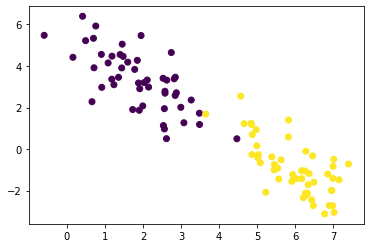

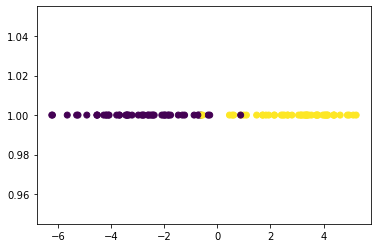

In [18]:
plt.scatter(X[:,0], X[:,1],c=y[:,0])

plt.figure()
_,P = pca(X,X.shape[1])

plt.scatter(P[:,0],np.ones(P.shape[0]),c=y[:,0])


**Comment:** When visualizing the points with labels, we see that it resembles a linear regression line, and that it is almost linearly separable by the vertical line x = 4.
After running PCA, the data set is separable,but around x = 0. The PCA has managed to classify the points by spreading them around 0. It also seems as though PCA is a good solution for this particular dataset given the result, and that the first eigenvector represents much of the variance in the set

### Loading the second set of labels
The function *get_synthetic_data_with_labels2()* from the module *syntethicdata* provides a second labeled dataset.

In [19]:
X,y = syntheticdata.get_synthetic_data_with_labels2()

### Running PCA
As before, process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using *scatter()* before and after running PCA. Comment on the results.

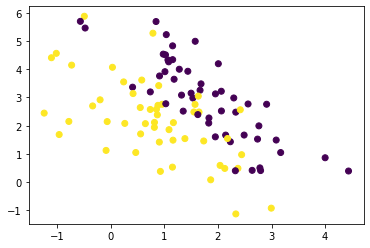

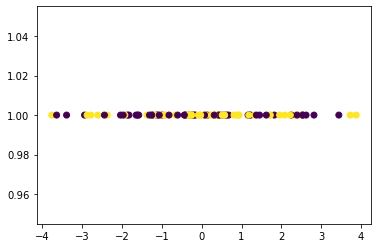

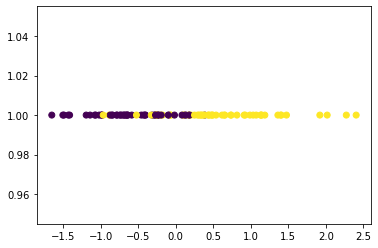

In [20]:
plt.scatter(X[:,0], X[:,1],c=y[:,0])
plt.figure()
_, P = pca(X, X.shape[1])

plt.scatter(P[:,0], np.ones(P.shape[0]), c=y[:,0])
plt.figure()
plt.scatter(P[:,1], np.ones(P.shape[0]), c=y[:,0])

**Comment:** Its hard to differentiate between the two classes when projected onto one dimension using only PCA1

How would the result change if you were to consider the second eigenvector? Or if you were to consider both eigenvectors?

**Answer**: When looking at the plot of the original data, it is clear that the variable separating the classes isn't along the axis of maximum variance (when drawing a line through the axis of largest variance, the different classes are above and under the line, respectively). This means even though the points are varying the most along that axis, this variable isn't the variable characterising. When drawing the line perpendicular to PCA1, rotate this line to match the x-axis and then project the points to the axis, we see there is a clearer vertical line along x= 0 that classify the points.

## Case study 1: PCA for visualization
We now consider the *iris* dataset, a simple collection of data (N=150) describing iris flowers with four (M=4) features. The features are: Sepal Length, Sepal Width, Petal Length and Petal Width. Each sample has a label, identifying each flower as one of 3 possible types of iris: Setosa, Versicolour, and Virginica.

Visualizing a 4-dimensional dataset is impossible; therefore we will use PCA to project our data in 2 dimensions and visualize it.

### Loading the data
The function *get_iris_data()* from the module *syntethicdata* returns the *iris* dataset. It returns a data matrix of dimension [150x4] and a label vector of dimension [150].

In [21]:
X,y = syntheticdata.get_iris_data()

### Visualizing the data by selecting features
Try to visualize the data (using label information) by randomly selecting two out of the four features of the data. You may try different pairs of features.

<Figure size 432x288 with 0 Axes>

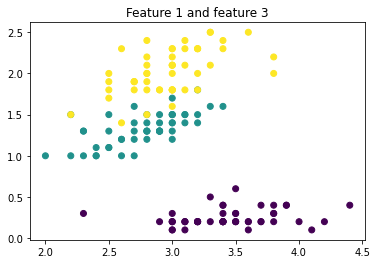

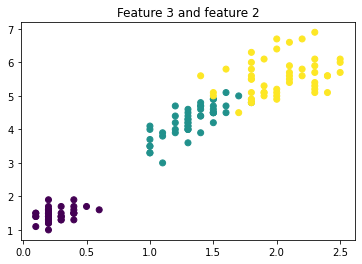

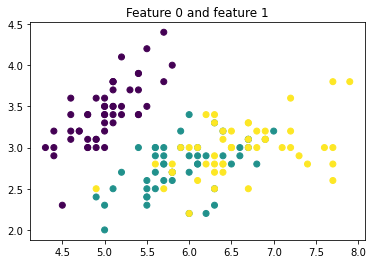

<Figure size 432x288 with 0 Axes>

In [22]:
# Randomizing two features

nFeats = 4

for i in range(2):
    feat1 = np.random.randint(0, nFeats)
    feat2 = np.random.randint(0, nFeats)
    while(feat2 == feat1):
        feat2 = np.random.randint(0, nFeats)

    plt.scatter(X[:, feat1], X[:, feat2], c=y)
    plt.title(f"Feature {feat1} and feature {feat2}")
    plt.figure()

feat1 = 0
feat2 = 1
plt.scatter(X[:, feat1], X[:, feat2], c=y)
plt.title(f"Feature {feat1} and feature {feat2}")
plt.figure()


### Visualizing the data by PCA
Process the data using PCA and visualize it (using label information). Compare with the previous visualization and comment on the results.

<Figure size 432x288 with 0 Axes>

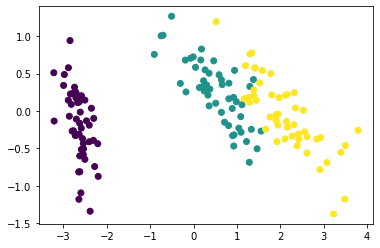

<Figure size 432x288 with 0 Axes>

In [23]:
_, P = pca(X, X.shape[1])

plt.scatter(P[:,0], P[:, 1], c=y)
plt.figure()

**Comment:** Enter your comment here.

Chose features 0 and 1 for this comment, so that the comment applies for every run instead of commenting on a randomized solution.

Before running the PCA, it was hard to extract disambigous data from the plots, as in some of them the yellow and green clouds overlapped quite a bit. The purple one seemed separatable in all of them. After running the PCA and visualizing it, it was much easier to separate the individual classes from eachother. The purple one was still very different from the two others, but the yellow and green also had a much smaller overlapping area than on the other plots. The new variables created by the PCA seems to be much more efficient at separating the classes from eachother than the features alone (it extracts useful information effectively)

## Case study 2: PCA for compression
We now consider the *faces in the wild (lfw)* dataset, a collection of pictures (N=1280) of people. Each pixel in the image is a feature (M=2914).

### Loading the data
The function *get_lfw_data()* from the module *syntethicdata* returns the *lfw* dataset. It returns a data matrix of dimension [1280x2914] and a label vector of dimension [1280]. It also returns two parameters, $h$ and $w$, reporting the height and the width of the images (these parameters are necessary to plot the data samples as images). Beware, it might take some time to download the data. Be patient :) 

In [24]:
X,y,h,w = syntheticdata.get_lfw_data()

### Inspecting the data
Choose one datapoint to visualize (first coordinate of the matrix $X$) and use the function [imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html) to plot and inspect some of the pictures.

Notice that *imshow* receives as a first argument an image to be plot; the image must be provided as a rectangular matrix, therefore we reshape a sample from the matrix $X$ to have height $h$ and width $w$. The parameter *cmap* specifies the color coding; in our case we will visualize the image in black-and-white with different gradations of grey.

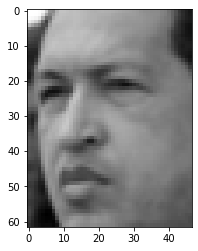

In [25]:
plt.imshow(X[0,:].reshape((h, w)), cmap=plt.cm.gray)

### Implementing a compression-decompression function
Implement a function that first uses PCA to project samples in low-dimensions, and the reconstruct the original image.

*Hint:* Most of the code is the same as the previous PCA() function you implemented. You may want to refer to *Marsland* to check out how reconstruction is performed.

In [26]:
def encode_decode_pca(A,m):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # m    integer number denoting the number of learned features (m <= M)
    #
    # OUTPUT:
    # Ahat [NxM] numpy PCA reconstructed data matrix (N samples, M features)
    
    # Finding the reconstructed matrix is doing the PCA in reverse
    # Multiply the P-matrix by its eigenvectors and adding 
    # the mean-values that were removed when centering the data
    
    eigvec, P = pca(A, m)
    mu = np.mean(A, axis=0)
    Ahat = np.dot(P, eigvec.T) + mu
    return Ahat

### Compressing and decompressing the data
Use the implemented function to encode and decode the data by projecting on a lower dimensional space of dimension 200 (m=200).

In [27]:
Xhat = encode_decode_pca(X,200)

### Inspecting the reconstructed data
Use the function *imshow* to plot and compare original and reconstructed pictures. Comment on the results.

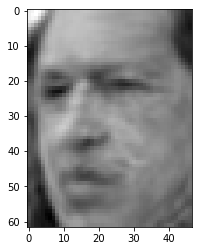

In [28]:
plt.imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)

**Comment:** When projecting the original 2914 features onto 200 dimensions, we lose quite a lot of detail in the photo. The general composition of the photo is still there, but the resolution is much lower. The color scheme is fairly similiar. 200 dimensions are enough to capture the main variance, giving the outline of the original photo, but not enough to recreate the smaller variance giving the details. It captures mainly the contrasts in the photo, as expected when we know that variance represent the largest spread of the data, and the largest spread is where the color scheme varies between black and white, not different shades of gray

### Evaluating different compressions
Use the previous setup to generate compressed images using different values of low dimensions in the PCA algorithm (e.g.: 100, 200, 500, 1000). Plot and comment on the results.

<Figure size 432x288 with 0 Axes>

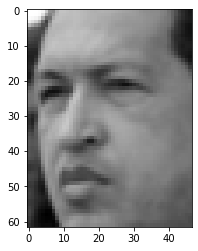

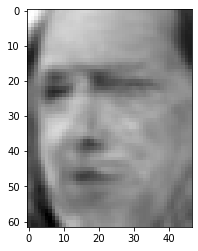

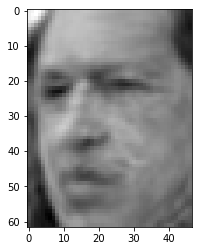

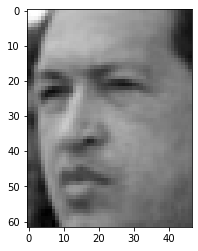

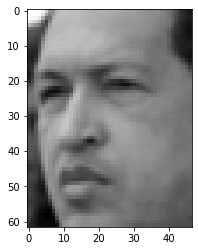

<Figure size 432x288 with 0 Axes>

In [29]:
from tqdm import tqdm_notebook as tqdm

plt.imshow(X[0,:].reshape((h, w)), cmap=plt.cm.gray)
plt.figure()

Xhat = encode_decode_pca(X,100)
plt.imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)
plt.figure()

Xhat = encode_decode_pca(X,200)
plt.imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)
plt.figure()

Xhat = encode_decode_pca(X, 500)
plt.imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)
plt.figure()

Xhat = encode_decode_pca(X,1000)
plt.imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)
plt.figure()


**Comment:** The photo with 500 features, out of 2914 originally, is enough for the face to be identified quite easily. By increasing to 1000 features, we don't really achieve much more details, but the resolution is a bit better. This means the most important features of the 2914 can be transformed to less than 1000 features containing enough information to create a nearly identical reconstruction using the PCA algorithm. This also means almost the entirety of the variance is in the 500 components or so. 

# K-Means Clustering
In this section you will use the *k-means clustering* algorithm to perform unsupervised clustering. Then you will perform a qualitative assesment of the results.

### Importing scikit-learn library
We start importing the module *cluster.KMeans* from the standard machine learning library *scikit-learn*.

In [30]:
from sklearn.cluster import KMeans

### Loading the data
We will use once again the *iris* data set. The function *get_iris_data()* from the module *syntethicdata* returns the *iris* dataset. It returns a data matrix of dimension [150x4] and a label vector of dimension [150].

In [31]:
X,y = syntheticdata.get_iris_data()

### Projecting the data using PCA
To allow for visualization, we project our data in two dimensions as we did previously. This step is not necessary, and we may want to try to use *k-means* later without the PCA pre-processing. However, we use PCA, as this will allow for an easy visualization.

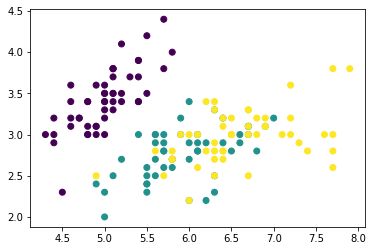

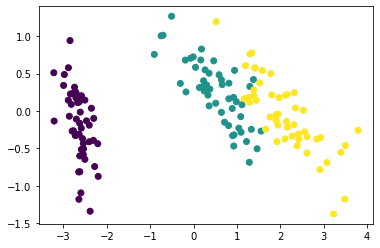

In [32]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.figure()

# Reduced to two dimensions using PCA
_,P = pca(X, 2)
plt.scatter(P[:,0],P[:,1], c=y)

### Running k-means
We will now consider the *iris* data set as an unlabeled set, and perform clustering to this unlabeled set. We can compare the results of the clustering to the lableled calsses.

Use the class *KMeans* to fit and predict the output of the *k-means* algorithm on the projected data. Run the algorithm using the following values of $k=\{2,3,4,5\}$. 

In [33]:
KM = KMeans(n_clusters=2)
yhat2 = KM.fit_predict(P)
yhat2_list = []

k_list = [2,3,4,5]
for k in k_list:
    KM = KMeans(n_clusters=k)
    yhat2 = KM.fit_predict(P)
    yhat2_list.append(yhat2)

### Qualitative assessment
Plot the results of running the k-means algorithm, compare with the true labels, and comment.

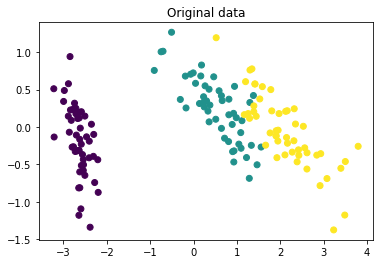

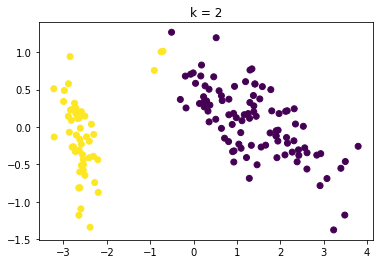

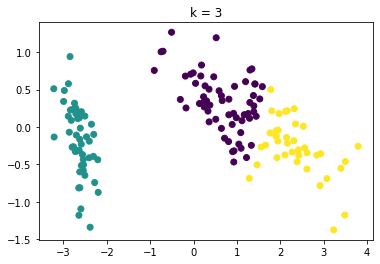

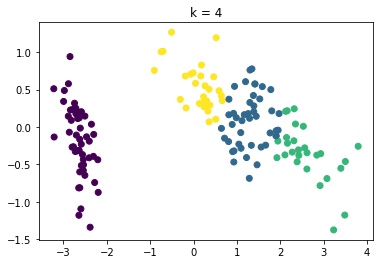

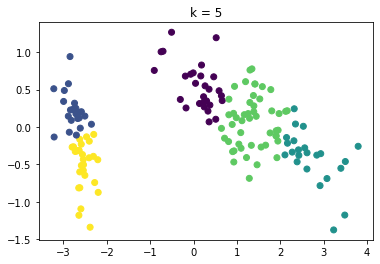

In [34]:
plt.figure()
plt.scatter(P[:,0],P[:,1],c=y)
plt.title('Original data')

k_cnt = 2
for i in yhat2_list:
    plt.figure()
    plt.scatter(P[:,0],P[:,1],c=i)
    plt.title(f"k = {k_cnt}")
    k_cnt += 1

**Comment:** Choosing the appropriate number of k's presupposes that we know something about the data beforehand, otherwise we will get adverse classification of the data. Either finding differences that aren't really there and thereby creating clusters inside what is really one larger cluster. Exploring different k's can on the other hand in some cases tell us something about the data we had not predicted in advance, that the data could be interpretend in a different way than first assumed.

# Quantitative Assessment of K-Means

We used k-means for clustering and we assessed the results qualitatively by visualizing them. However, we often want to be able to measure in a quantitative way how good the clustering was. To do this, we will use a classification task to evaluate numerically the goodness of the representation learned via k-means.

Reload the *iris* dataset. Import a standard `LogisticRegression` classifier from the module `sklearn.linear_model`. Use the k-means representations learned previously (`yhat2,...,yhat5`) and the true label to train the classifier. Evaluate your model on the training data (we do not have a test set, so this procedure will assess the model fit instead of generalization) using the `accuracy_score()` function from the *sklearn.metrics* module. Plot a graph showing how the accuracy score varies when changing the value of k. Comment on the results.

- Train a Logistic regression model using the first two dimensions of the PCA of the iris data set as input, and the true classes as targets.
- Report the model fit/accuracy on the training set.
- For each value of K:
  - One-Hot-Encode the classes outputed by the K-means algorithm.
  - Train a Logistic regression model on the K-means classes as input vs the real classes as targets.
  - Calculate model fit/accuracy vs. value of K.
- Plot your results in a graph and comment on the K-means fit.

In [35]:
def toOneHot(labelList):
    nClasses = len(set(labelList))  
    oneHotArray = []
    
    for label in labelList:
        convert = [1 if x == label else 0 for x in range(nClasses)] 
        oneHotArray.append(convert)
        
    return np.array(oneHotArray)

Accuracy on training data for 2D PCA: 0.9666666666666667
Accuracy on training data when k = 2: 0.6666666666666666
Accuracy on training data when k = 3: 0.8866666666666667
Accuracy on training data when k = 4: 0.8466666666666667
Accuracy on training data when k = 5: 0.84


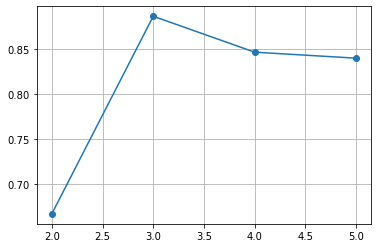

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X,y = syntheticdata.get_iris_data()
_, P = pca(X, 2)
lr = LogisticRegression()
lr.fit(P, y)
predict = lr.predict(P)
print(f"Accuracy on training data for 2D PCA: {metrics.accuracy_score(y, predict)}")

scores = []

k_cnt = 2
for i in yhat2_list:
    # One-hot encoding the outputs from the K-means algorithm
    i = toOneHot(i)
    # Train the model
    lr = LogisticRegression().fit(i, y)
    # Predict the classes
    predicted = lr.predict(i)
    # Check the accuracy
    accuracy = metrics.accuracy_score(y, predicted)
    scores.append(accuracy)
    print(f"Accuracy on training data when k = {k_cnt}: {accuracy}")
    k_cnt += 1
    
# Plot results
plt.plot(np.array(k_list), np.array(scores), marker='o')
plt.grid()

**Comment:** The accuracy increase with each added cluster (k), except for a small dip in k = 4. Adding extra classes seems to help differentiate between the classes and capture the differences between them better. We feed the regression model more data, and thus getter a better prediction 

# Conclusions 

In this notebook we studied **unsupervised learning** considering two important and representative algorithms: **PCA** and **k-means**.

First, we implemented the PCA algorithm step by step; we then run the algorithm on synthetic data in order to see its working and evaluate when it may make sense to use it and when not. We then considered two typical uses of PCA: for **visualization** on the *iris* dataset, and for **compression-decompression** on the *lfw* dateset.

We then moved to consider the k-means algorithm. In this case we used the implementation provided by *scikit-learn* and we applied it to another prototypical unsupervised learning problem: **clustering**; we used *k-means* to process the *iris* dataset and we evaluated the results visually.

In the final part, we considered two additional questions that may arise when using the above algorithms. For PCA, we considered the problem of **selection of hyper-parameters**, that is, how we can select the hyper-parameter of ou algorithm in a reasonable fashion. For k-means, we considered the problem of the **quantitative evaluation** of our results, that is, how can we measure the performance or usefulness of our algorithms. 